# Group 10 - Homework 3 -[LOGISTIC REGRESSION]

## Group Members:

1. Mahajabin Mostafa
2. Navya Madhuri Bagireddy
3. Akshay Manoj
4. Vinaika Maruvada

### Question 1

#### Knowing the graph of the sigmoid function is the following, answer the following questions.
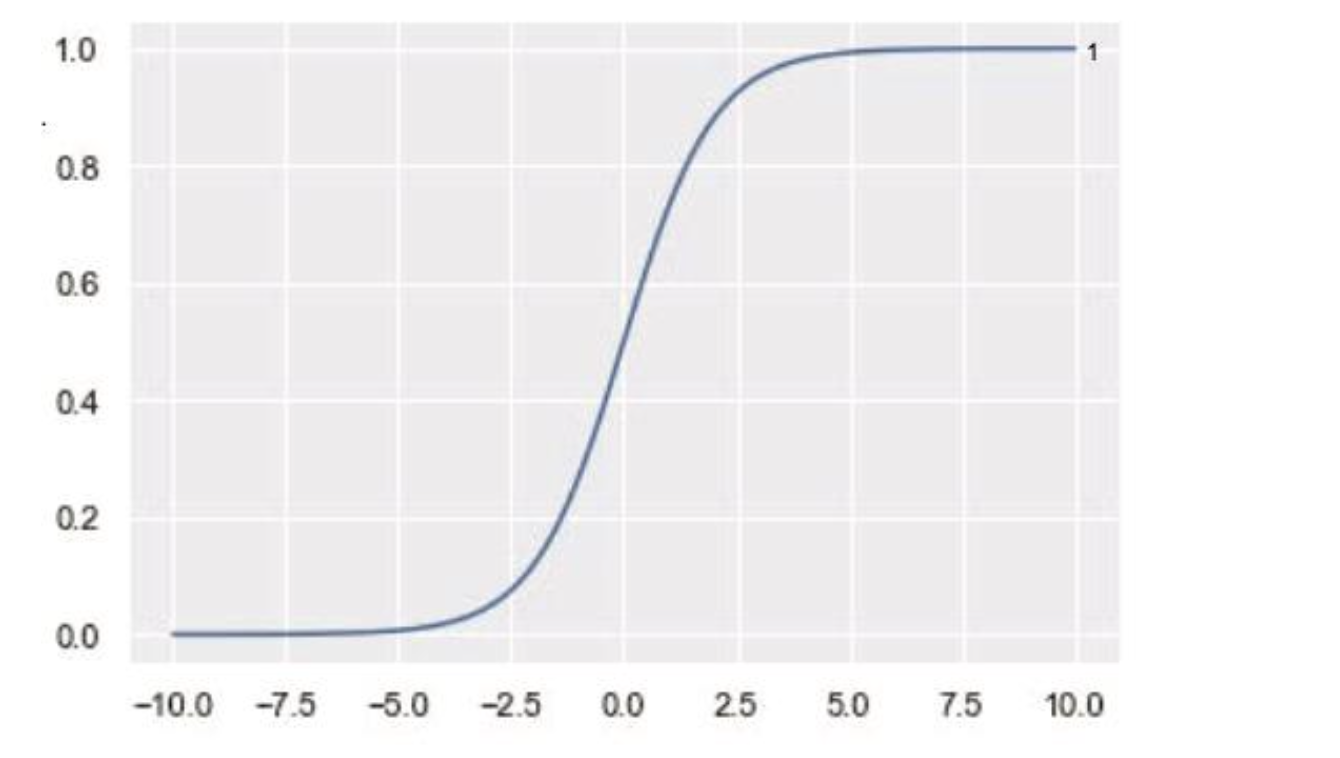


A sigmoid function is  a mathematical function with a characteristic "S" shaped curve or sigmoid curve. It transforms any value in the domain to a number between 0 and 1.The sigmoid function is one of the most commonly used activation functions. The sigmoid function is a special form of the logistic function and is usually denoted by σ(x) or sig(x). It is given by:
                       σ(x) = 1/(1+exp(-x))
Here, e is the base of the natural logarithm (approximately equal to 2.71828). As x varies from negative infinity to positive infinity, σ(x) gradually transitions from 0 to 1, following a smooth curve. 

#### (i) Why is the output of σ in the interval (0, 1)?

The output of the sigmoid function σ(x) = 1 / (1 + e^(-x)) is bounded between 0 and 1  as for any real number x, e^(-x) is always positive, as it represents the exponential of a negative number. Consequently, the denominator 
(1 + e^(-x)) is always greater than 1. When you divide 1 by a value greater than 1,the result is less than 1. Therefore, σ(z) is always between 0 and 1, exclusive of 0 and 1.

#### (ii)Why is it that the output of σ cannot be equal to 0 or 1?

The sigmoid function's output cannot be exactly 0 or 1 due to the properties of exponential functions. As x approaches positive infinity, e^(-x) approaches 0, making the denominator (1 + e^(-x)) approach 1, but it never actually reaches 1. Similarly, as z approaches negative infinity, e^(-x) approaches infinity, making the denominator (1 + e^(-x)) approach infinity. Therefore, the output of the sigmoid function asymptotically approaches 0 and 1 but never reaches these values.

#### (iii)For what value of z is σ(z) = 0.5?

To find the value of z for which σ(z) = 0.5, we can use the equation of the sigmoid function:

                 σ(z) = 1 / (1 + e^(-z))
                    
Setting σ(z) equal to 0.5

                 0.5 = 1 / (1 + e^(-z))
                 
Now, solving for z:

                1 / 2 = 1 / (1 + e^(-z))
                
                1 + e^(-z) = 2
                
                e^(-z) = 1
                
Taking the natural logarithm of both sides:

                -ln(e^(-z)) = ln(1)
                
                -z = 0                
                
Therefore, z = 0.

#### (iv)Show that σ'(z) = σ(z) · (1 − σ(z))

To derive the derivative of the sigmoid function σ(z), we can start by expressing σ(z) as:

                  σ(z) = 1 / (1 + e^(-z))

Using the quotient rule to differentiate σ(z) with respect to z:

                 σ'(z) =[(1)'(1 + e^(-z)) - (1 + e^(-z))'(1)] / (1 + e^(-z))^2

                       = [0(1 + e^(-z)) - (-1)(e^(-z))] / (1 + e^(-z))^2

                       = e^(-z) / (1 + e^(-z))^2

Now, rewriting σ(z) as (1 + e^(-z))^(-1):

                  σ(z) = (1 + e^(-z))^(-1)

                 σ'(z) = - (1 + e^(-z))^(-2) * (-e^(-z))

                       = e^(-z) / (1 + e^(-z))^2

Comparing this expression with the earlier result for σ'(z), we can see that σ'(z) = σ(z) · (1 − σ(z)).

## Question 2 

#### Use HR.csv data set and consider column ”left” to be the target variable with ”1” meaning the person left the company and ”0” meaning that the person did not leave the company.

#### (i)Investigate using various graphs/charts how given features affect this target variable.

#### (ii)Choose several features and build the sklearn logistic regression model predicting the target variable “left”.

#### (iii)Discuss the model performance (the confusion matrix and the classification report on the test set.

## AIM: 

* To investigate how given features affect this target variable through some EDA.
* To choose the best features and build a logistic regression model to predict the target variable "left" and to assess the models performance using accuracy metrics.

## ABOUT THE DATASET:

The HR Employee analytics dataset is an MNC company's HR data has been transformed for academic purposes. This dataset is often used for analyzing employee attrition, understanding factors influencing employee retention, and building predictive models for HR analytics purposes. It conatins 11 columns:

* **Emp_Id:** Id of Employee
* **satisfaction_level:** Satisfaction level of employee in percentage. 100% or 1 is very satisfied. 0% or 0 is not satisfied
* **last_evaluation:** Time from last evaluation in years
* **number_project:** Number of projects an employee is working on
* **average_monthly_hours:** Average hours worked by employee in last 3 months
* **time_spend_company:** Time spend my employee commuting to office
* **Work_accident:** If the employee was involved in a work accident: 0- No; 1-Yes
* **promotion_last_5years:** If the employee has a promotion in past 5 years: 0- No; 1-Yes
* **Departemnt:** Department employee is working in
* **salary:** level of employees salary: low, medium, high
* **left:** target variable, If the employee has left the company: 0- No; 1-Yes

## METHODOLOGY:

#### 1.Importing the libraries

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### 2.Importing the dataset

In [146]:
df = pd.read_excel('HR_Employee_Data.xlsx')

In [147]:
df

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,IND40221,0.40,0.57,2,151,3,0,1,0,support,low
14995,IND24196,0.37,0.48,2,160,3,0,1,0,support,low
14996,IND33544,0.37,0.53,2,143,3,0,1,0,support,low
14997,IND40533,0.11,0.96,6,280,4,0,1,0,support,low


**3.Data Cleaning**

In [148]:
df.shape

(14999, 11)

In [149]:
null_counts = df.isnull().sum()
print(null_counts)

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


There are no null values in our dataset and also there are 14999 records and 11 columns in this dataset

In [150]:
# We dont need the Emp_id column for the further analysis, so we are dropping it.
df=df.drop('Emp_Id',axis=1)

In [151]:
#Label Encoding "Department" and "salary" variables for the purpose of EDA.

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'department' column
df['Department'] = label_encoder.fit_transform(df['Department'])

# Encode 'salary' column
df['salary'] = label_encoder.fit_transform(df['salary'])


In [152]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [153]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


From the above output we can see different statistical quantities like count, mean, min, max etc.

**4. Exploratory Data Analysis**

In [154]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

**Count Plot**

<Axes: xlabel='left', ylabel='count'>

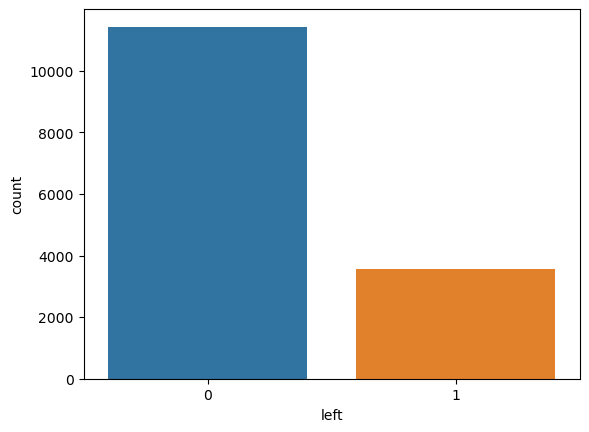

In [155]:
#count plot for target variable
plt.figure(dpi=100)
sns.countplot(data=df,x='left')

From the above count, we can see that, 11428 people havent left and 3571 people left.

**Histogram for numerical variables**

Text(0.5, 1.0, 'Histogram between time spend in company vs retention status')

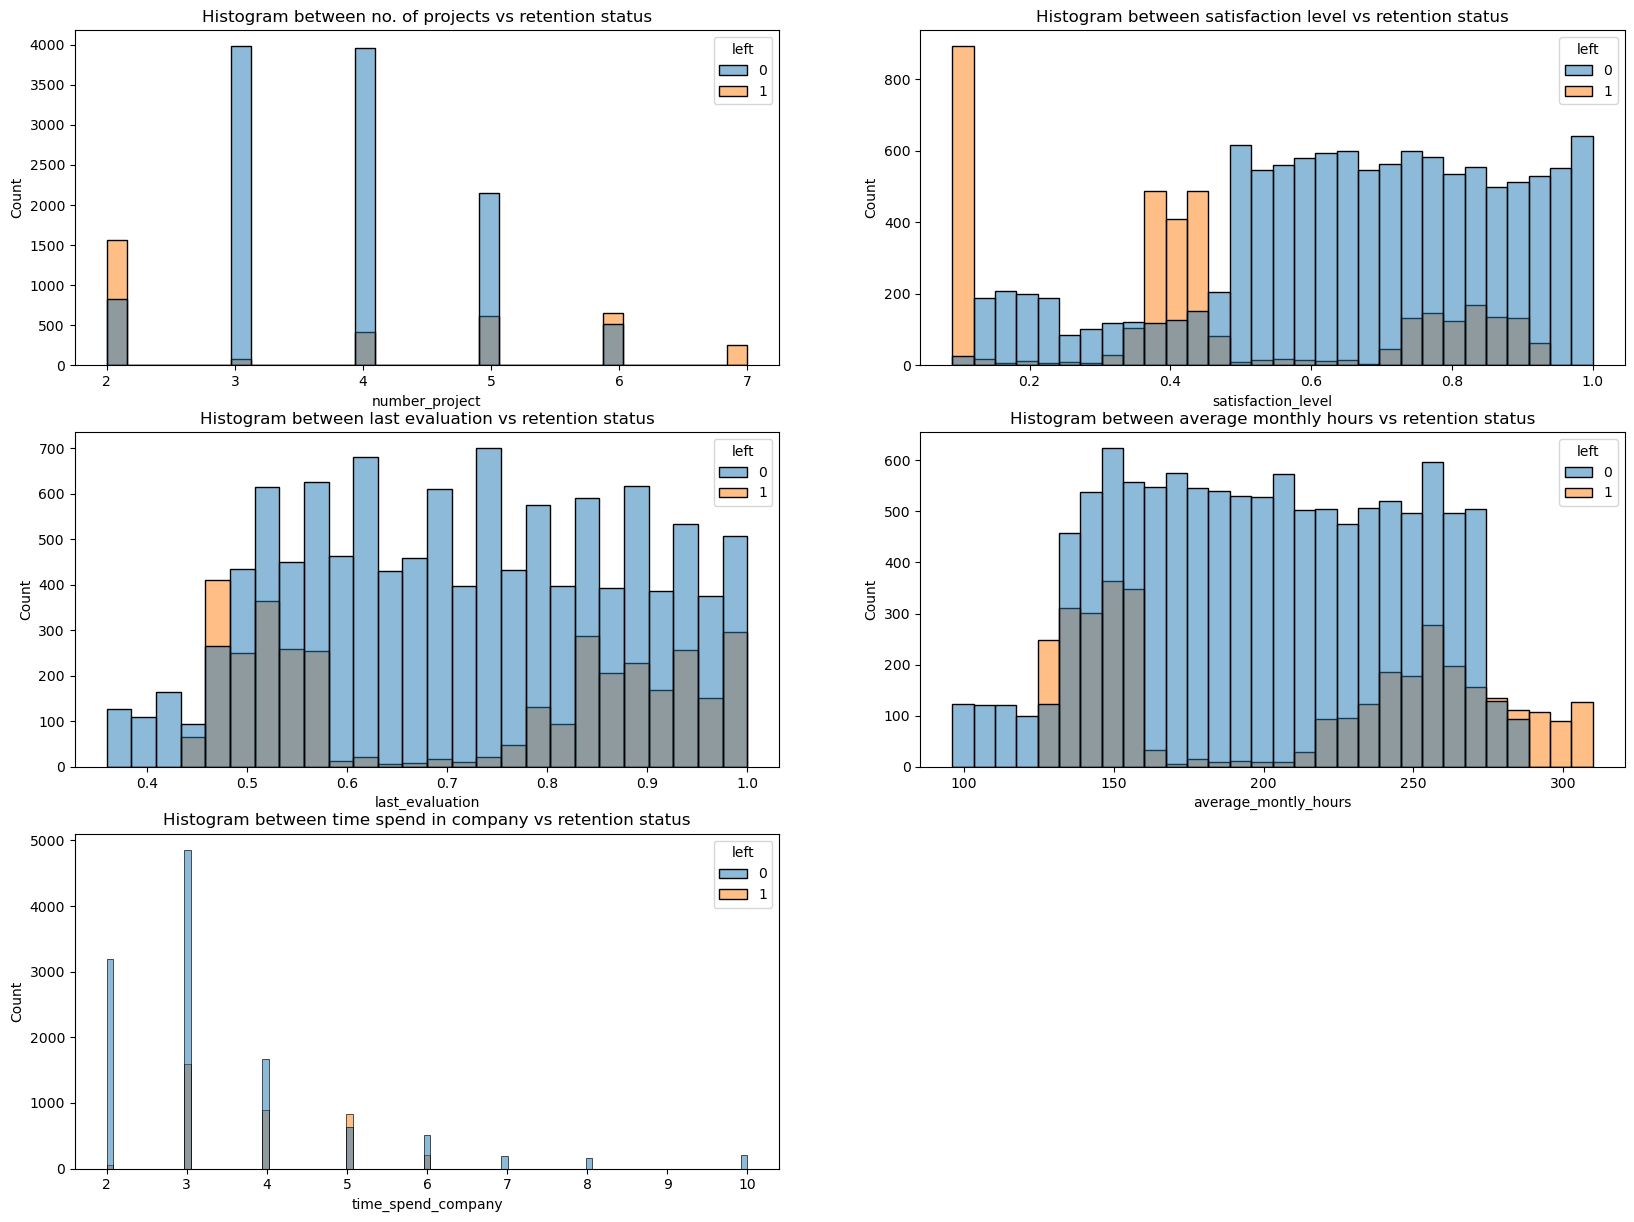

In [156]:
#histogram
plt.figure(figsize = (20,20))
plt.tight_layout(pad = 3.0)
plt.subplot(4,2,1)
sns.histplot(data=df,x='number_project',hue='left') 
plt.title('Histogram between no. of projects vs retention status')

plt.subplot(4,2,2)
sns.histplot(data=df,x='satisfaction_level',hue='left') 
plt.title('Histogram between satisfaction level vs retention status')
plt.subplot(4,2,3)
sns.histplot(data=df,x='last_evaluation',hue='left')
plt.title('Histogram between last evaluation vs retention status')
plt.subplot(4,2,4)
sns.histplot(data=df,x='average_montly_hours',hue='left')
plt.title('Histogram between average monthly hours vs retention status')
plt.subplot(4,2,5)
sns.histplot(data=df,x='time_spend_company',hue='left')
plt.title('Histogram between time spend in company vs retention status')

* Employees working on 3 projects tend to stay the longest, while those with 5 or more projects might leave due to burnout or lack of interest.
* Low job satisfaction, especially at 0, often leads to employees leaving the company.
* Employees with performance ratings around 0.7 are more likely to stay. High-performing employees may leave if they feel they lack opportunities. Uninterested or low-performing employees are also prone to leaving.
* Employees who worked between 170-220 hours tend to stay the longest, but those working more than 225 hours may leave due to burnout. Employees who worked less than 120 hours may have a lower attrition rate.
* Surprisingly, employees who spent 7, 8, or 10 hours traveling stayed with the company, while those with 3-5 hours of commute time tended to leave.

**Box Plot for numerical variables**

Text(0.5, 1.0, 'Boxplot between time spend in company vs retention status')

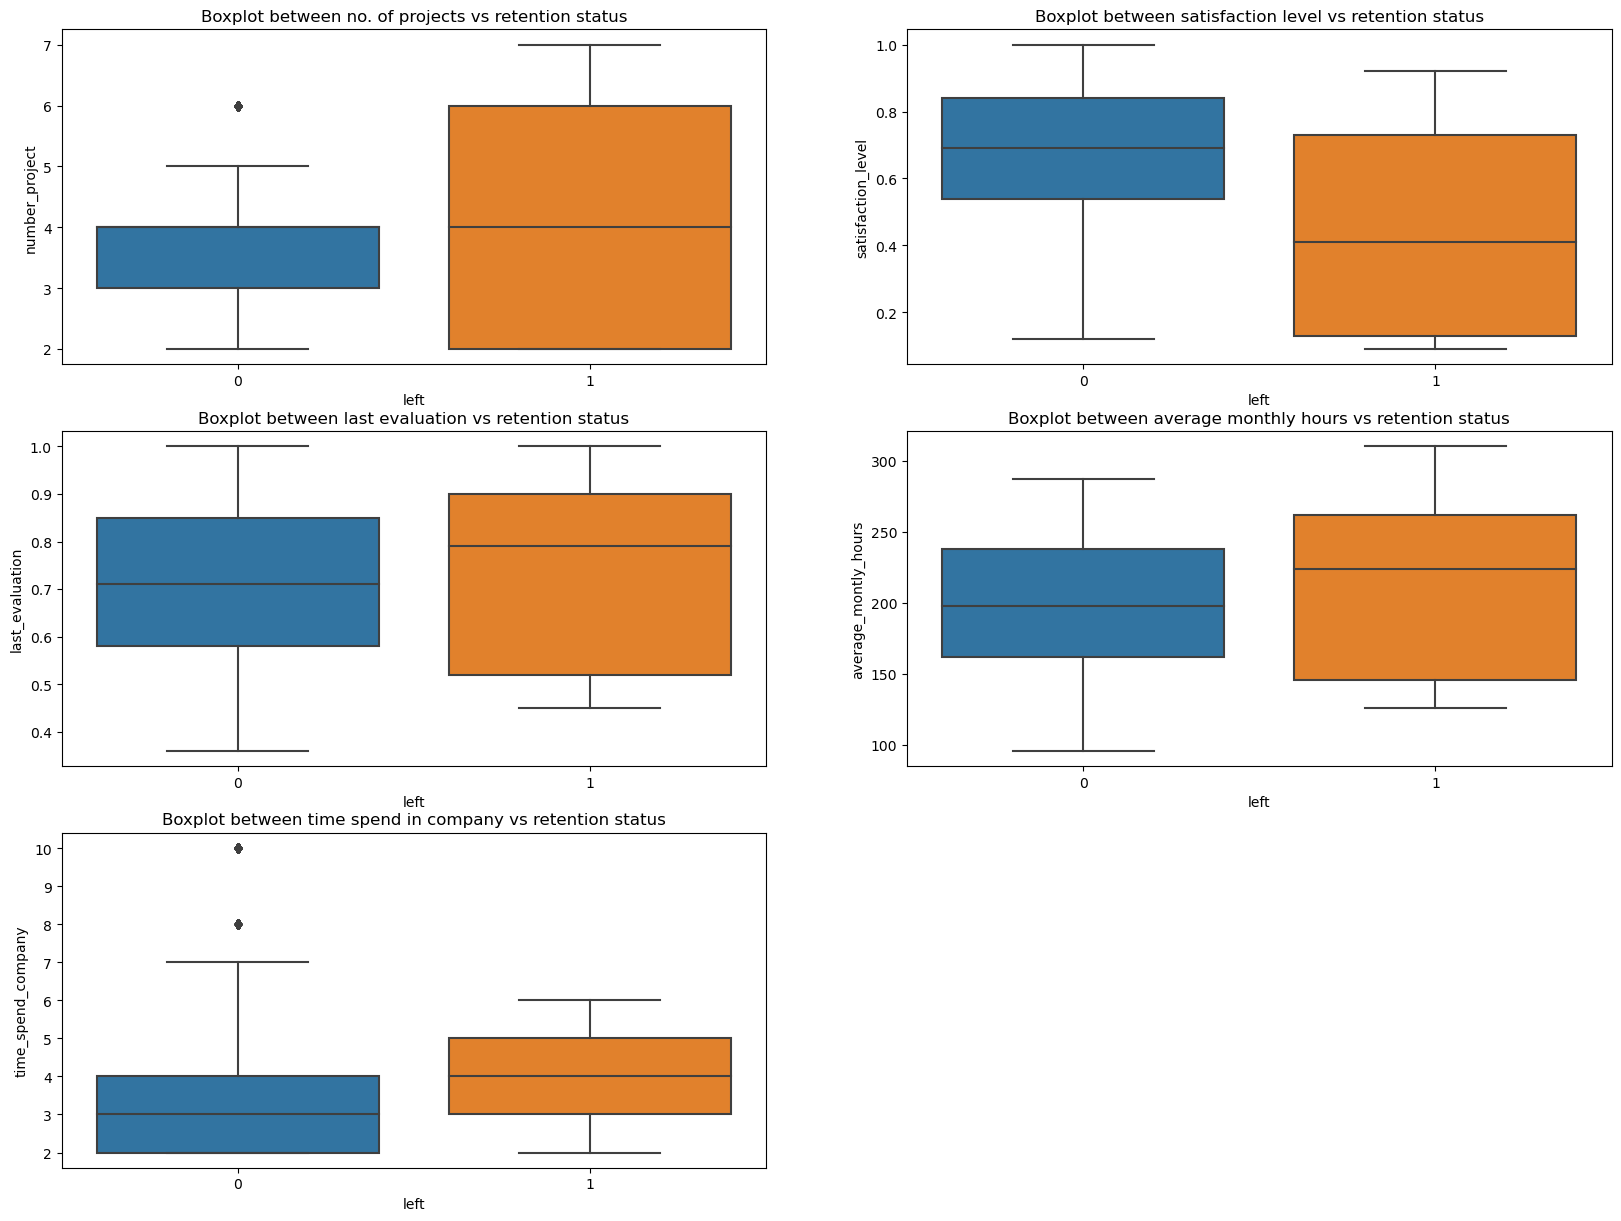

In [157]:
#box plot
plt.figure(figsize = (20,20))
plt.tight_layout(pad = 3.0)
plt.subplot(4,2,1)
sns.boxplot(x='left',y='number_project',data=df)
plt.title('Boxplot between no. of projects vs retention status')
plt.subplot(4,2,2)
sns.boxplot(x='left',y='satisfaction_level',data=df)
plt.title('Boxplot between satisfaction level vs retention status')
plt.subplot(4,2,3)
sns.boxplot(x='left',y='last_evaluation',data=df)
plt.title('Boxplot between last evaluation vs retention status')
plt.subplot(4,2,4)
sns.boxplot(x='left',y='average_montly_hours',data=df)
plt.title('Boxplot between average monthly hours vs retention status')
plt.subplot(4,2,5)
sns.boxplot(x='left',y='time_spend_company',data=df)
plt.title('Boxplot between time spend in company vs retention status')


From the above box plot, we can see that there are outliers for time spend in company and no. of projects. Also, from the box we can clearly see the median of each variable w.r.t to the employee's retention status.

**Histogram for categorical variables**

Text(0, 0.5, 'Frequency')

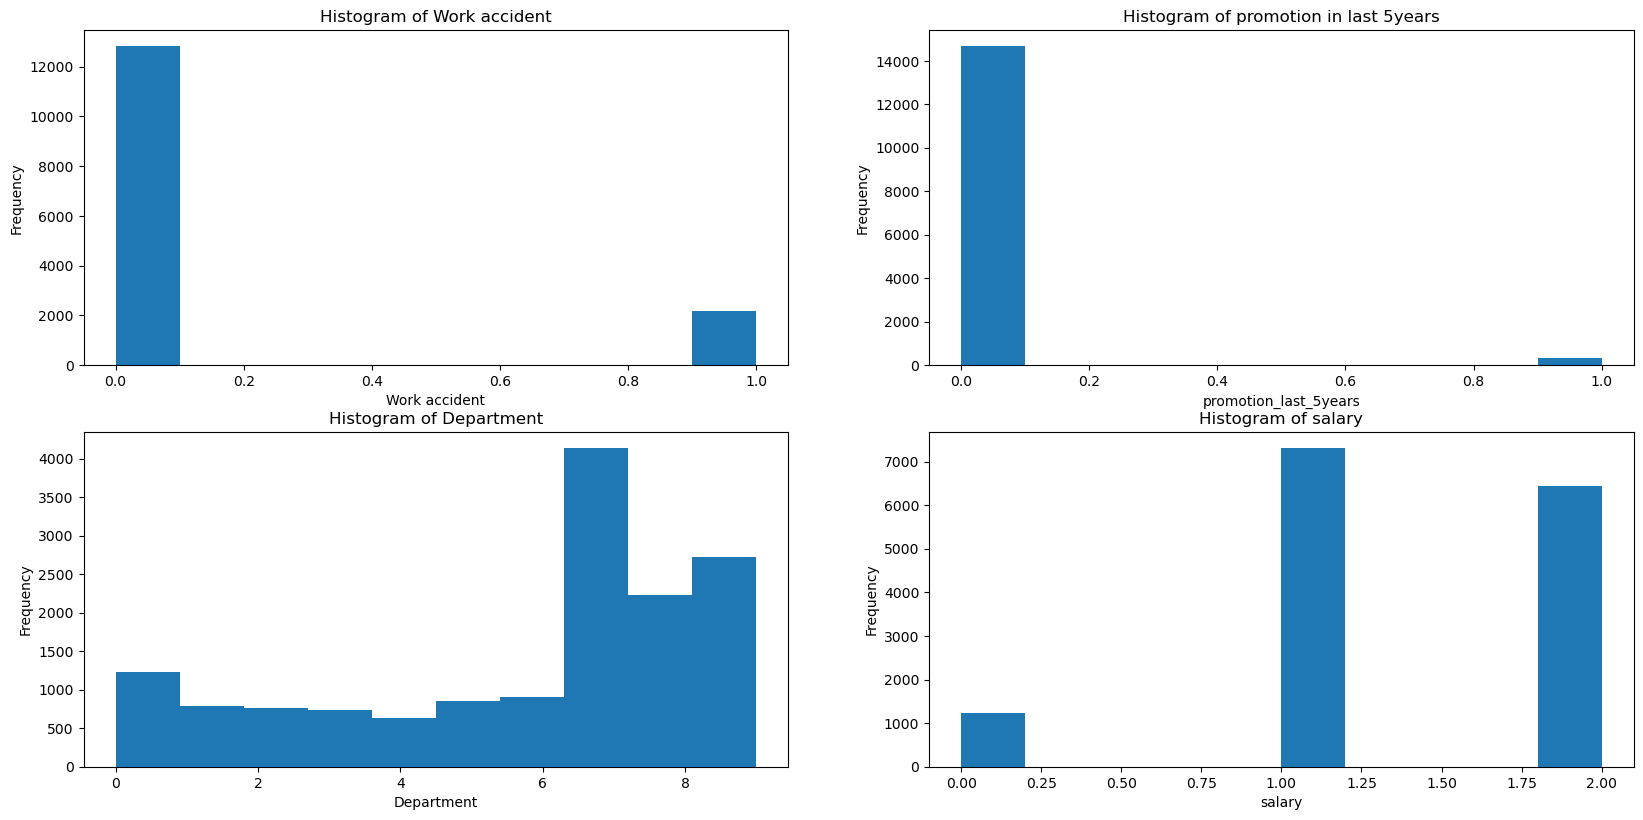

In [158]:
#histogram
plt.figure(figsize = (20,20))
plt.tight_layout(pad = 3.0)
plt.subplot(4,2,1)
plt.hist(x='Work_accident', data=df)
plt.title('Histogram of Work accident')
plt.xlabel('Work accident')
plt.ylabel('Frequency')

plt.subplot(4,2,2)
plt.hist(x='promotion_last_5years', data=df)
plt.title('Histogram of promotion in last 5years')
plt.xlabel('promotion_last_5years')
plt.ylabel('Frequency')

plt.subplot(4,2,3)
plt.hist(x='Department', data=df)
plt.title('Histogram of Department')
plt.xlabel('Department')
plt.ylabel('Frequency')

plt.subplot(4,2,4)
plt.hist(x='salary', data=df)
plt.title('Histogram of salary')
plt.xlabel('salary')
plt.ylabel('Frequency')



**Count Plot for categorical variables**

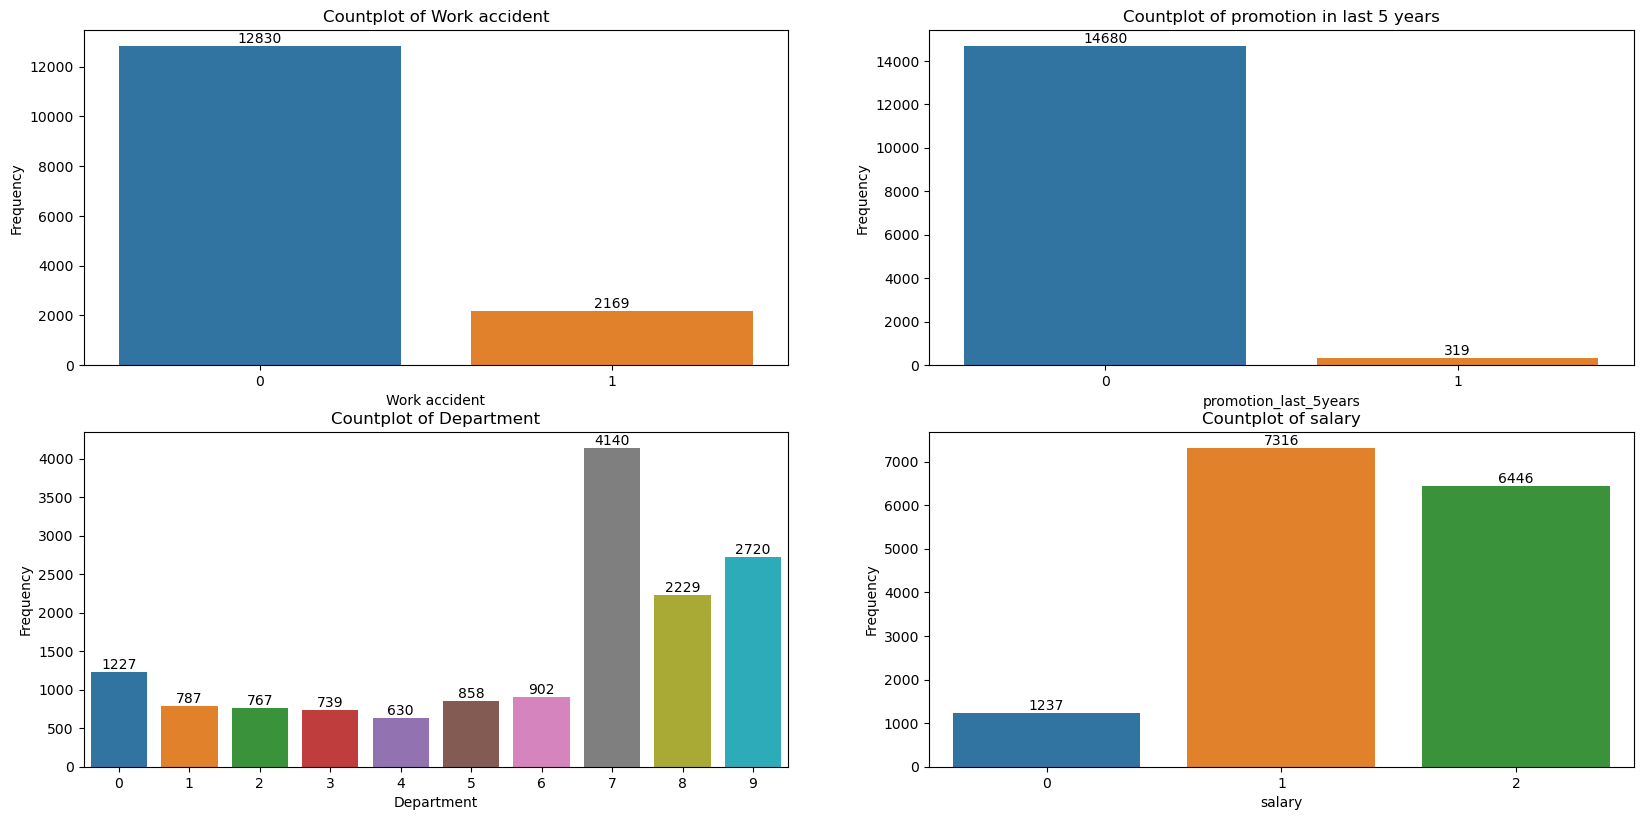

In [159]:
#count plot
plt.figure(figsize=(20, 20))
plt.tight_layout(pad=3.0)

plt.subplot(4, 2, 1)
ax = sns.countplot(x='Work_accident', data=df)
plt.title('Countplot of Work accident')
plt.xlabel('Work accident')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(4, 2, 2)
ax = sns.countplot(x='promotion_last_5years', data=df)
plt.title('Countplot of promotion in last 5 years')
plt.xlabel('promotion_last_5years')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(4, 2, 3)
ax = sns.countplot(x='Department', data=df)
plt.title('Countplot of Department')
plt.xlabel('Department')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(4, 2, 4)
ax = sns.countplot(x='salary', data=df)
plt.title('Countplot of salary')
plt.xlabel('salary')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


From the above histogram and count plots, we can see how these categorical variables are distributed and the count of their respective categories.

We see a lot of customers belong to 7th department and get medium level salary.

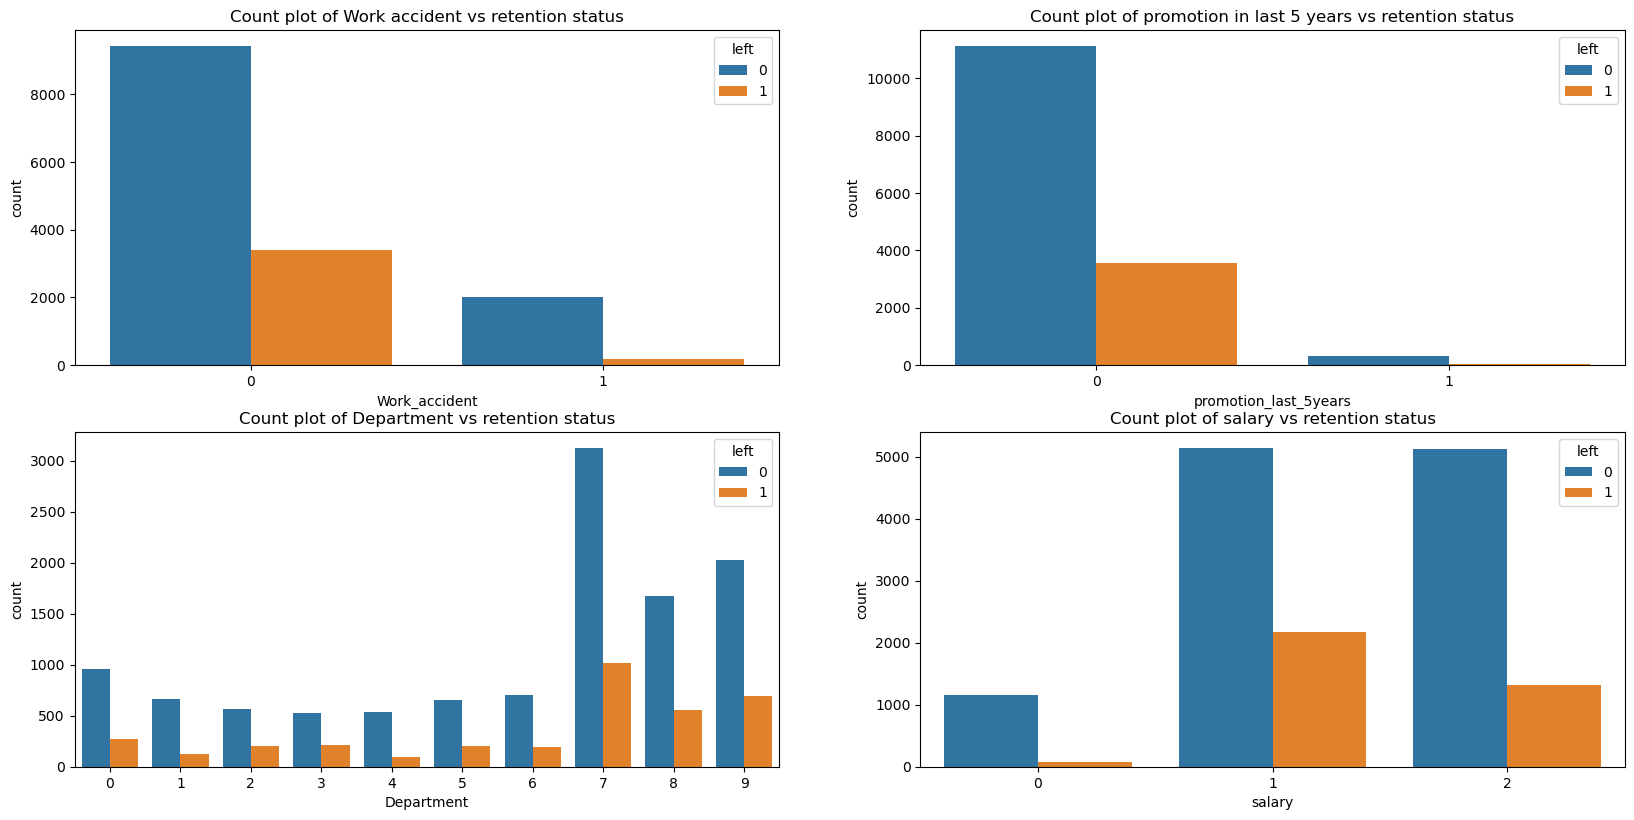

In [203]:
#count plot
plt.figure(figsize=(20, 20))
plt.tight_layout(pad=3.0)

plt.subplot(4, 2, 1)
sns.countplot(data=df,x='Work_accident',hue='left')
plt.title('Count plot of Work accident vs retention status')


plt.subplot(4, 2, 2)
ax = sns.countplot(x='promotion_last_5years', data=df,hue='left')
plt.title('Count plot of promotion in last 5 years vs retention status')


plt.subplot(4, 2, 3)
ax = sns.countplot(x='Department', data=df,hue='left')
plt.title('Count plot of Department vs retention status')


plt.subplot(4, 2, 4)
ax = sns.countplot(x='salary', data=df, hue='left')
plt.title('Count plot of salary vs retention status')


plt.show()



* The majority of employees who left the company were from departments 7 (Sales), 8 (Support), and 9 (Technical). This suggests that these departments may have faced specific challenges or issues leading to higher attrition rates.

* Employees with higher salary levels tended to stay with the company, while a significant portion of those who left belonged to the low (1) or medium (2) salary range. This indicates that compensation could play a crucial role in retaining employees.

* Work accidents did not seem to have a significant impact on employee attrition, as the coefficients for both categories (0 and 1) were negligible.

* A noteworthy observation is that most employees who left had not been promoted in the last 5 years. Conversely, a vast majority of those who were promoted chose to stay. This highlights the importance of providing adequate career growth opportunities and making effective promotion decisions to enhance employee retention.

**Pair plot**

C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

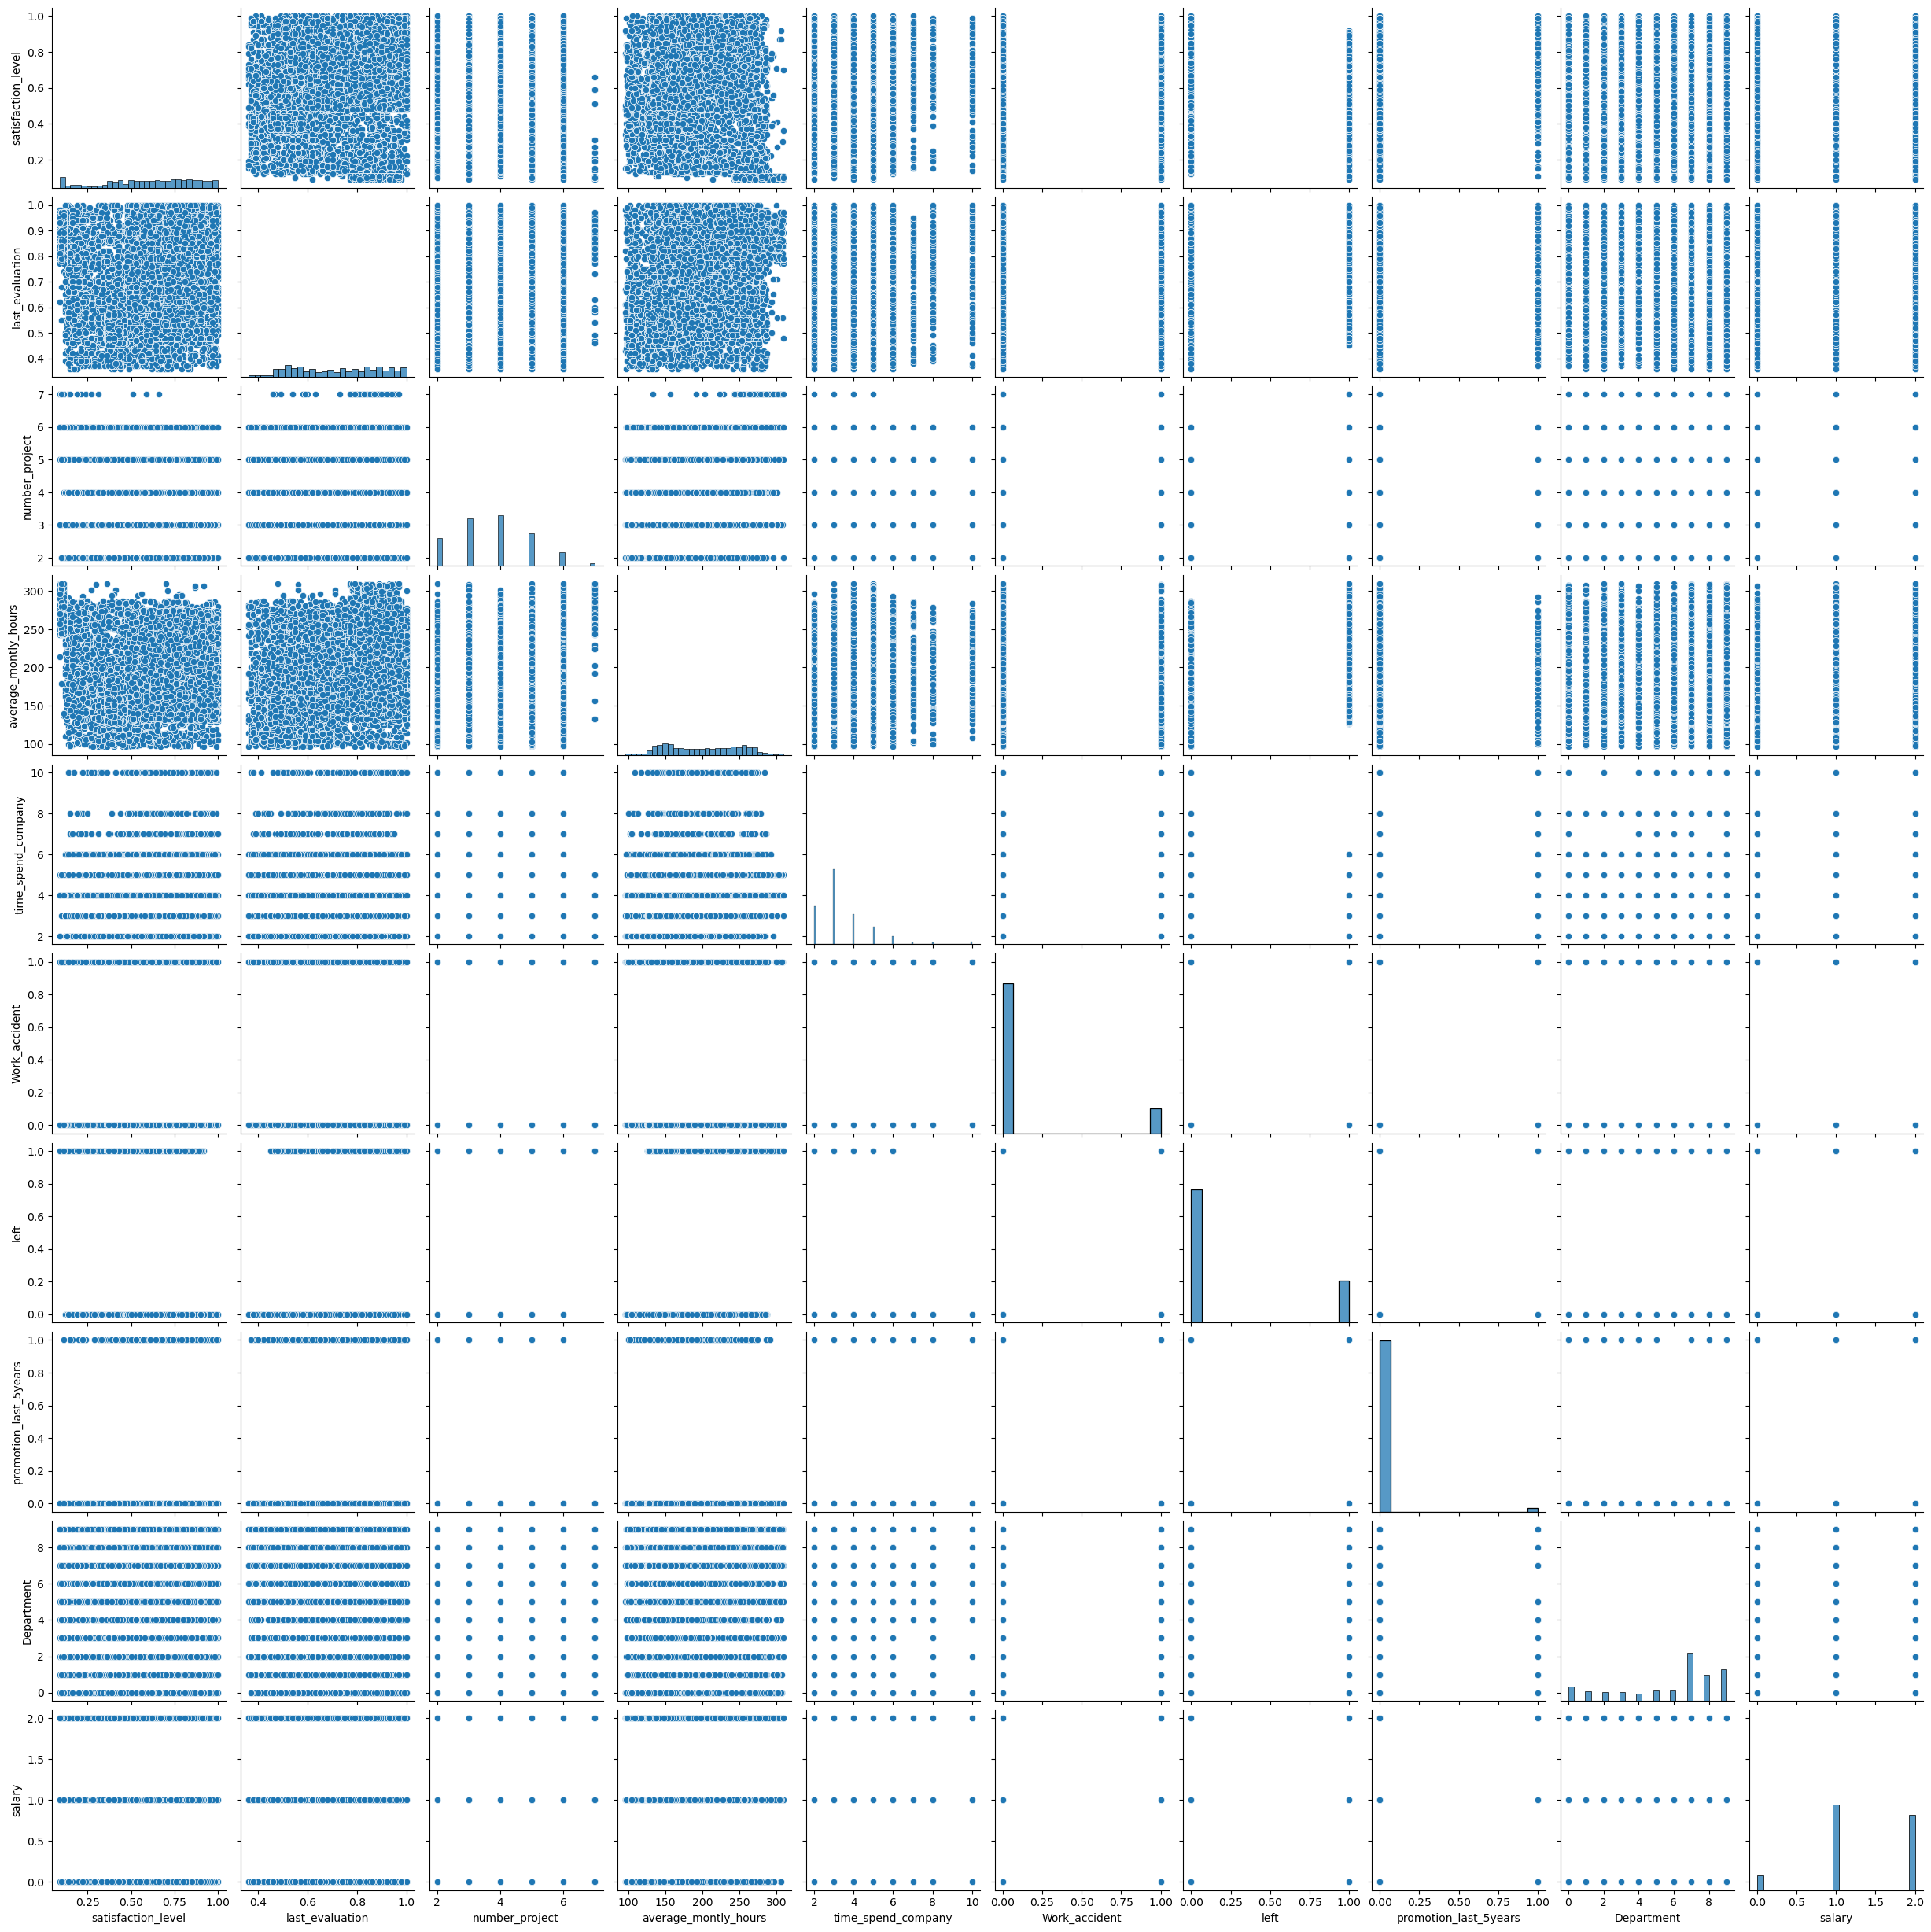

In [181]:
#pair plot
plt.figure(dpi=100)
sns.pairplot(df)

The above plots tells us about how the points are scattered for each variable and also the nature of the variables.

**Correlation coeffecients and Heat Map**

In [182]:
#correlation coeffecients
correlation_table = df.corr()
print(correlation_table)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
Department                       0.003153         0.007772        0.009268   
salary                           0.011754         0.013965        0.009672   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_ev

<Axes: >

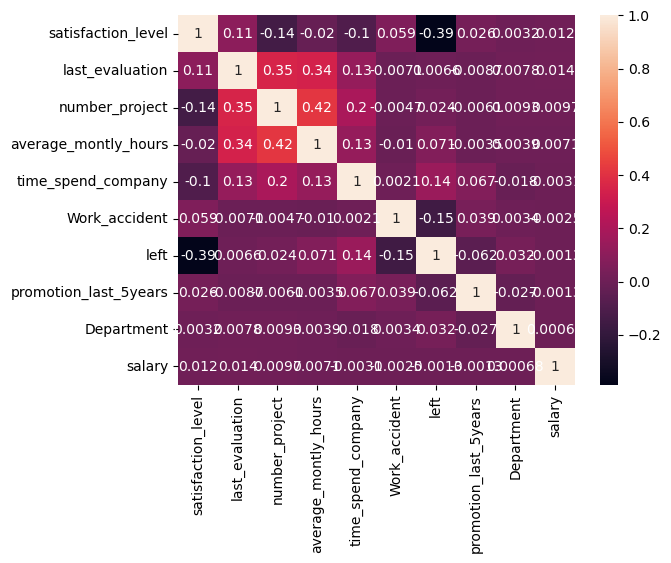

In [183]:
#heat map
plt.figure(dpi=100)
sns.heatmap(df.corr(),annot=True)

The correlation coefficient and heatmap gives us an idea about the correlation of one variable with another. 

**One-hot encoding for the categorical variables**

In [175]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# One-hot encode 'Work_accident' column
Work_accident_encoded = onehot_encoder.fit_transform(df[['Work_accident']])
Work_accident_encoded_df = pd.DataFrame(Work_accident_encoded, columns=onehot_encoder.get_feature_names(['Work_accident']))

# One-hot encode 'promotion_last_5years' column
promotion_last_5years_encoded = onehot_encoder.fit_transform(df[['promotion_last_5years']])
promotion_last_5years_encoded_df = pd.DataFrame(promotion_last_5years_encoded, columns=onehot_encoder.get_feature_names(['promotion_last_5years']))

# One-hot encode 'department' column
department_encoded = onehot_encoder.fit_transform(df[['Department']])
department_encoded_df = pd.DataFrame(department_encoded, columns=onehot_encoder.get_feature_names(['Department']))

# One-hot encode 'salary' column
salary_encoded = onehot_encoder.fit_transform(df[['salary']])
salary_encoded_df = pd.DataFrame(salary_encoded, columns=onehot_encoder.get_feature_names(['salary']))

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, Work_accident_encoded_df,promotion_last_5years_encoded_df, department_encoded_df, salary_encoded_df], axis=1)

# Drop the original 'department' and 'salary' columns
df_encoded.drop(['Work_accident', 'promotion_last_5years', 'Department', 'salary'], axis=1, inplace=True)

# Display the encoded DataFrame
print(df_encoded)


       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  left  Work_accident_0  \
0                       157                   3     1              1.0   
1                       262                   6     1              1.0   
2                       272      

C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Func

In [176]:
#again checking for null values if any
null_counts1 = df_encoded.isnull().sum()
print(null_counts1)


satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours       0
time_spend_company         0
left                       0
Work_accident_0            0
Work_accident_1            0
promotion_last_5years_0    0
promotion_last_5years_1    0
Department_0               0
Department_1               0
Department_2               0
Department_3               0
Department_4               0
Department_5               0
Department_6               0
Department_7               0
Department_8               0
Department_9               0
salary_0                   0
salary_1                   0
salary_2                   0
dtype: int64


**Splitting data into train and test and Building a Logistic regression Model**

Since, our target variable has two binary classes we will build a logistic regression model to predict the classes.

We will remove "time_spend_company" from the variables for building the model as we observed some outliers in the data.

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# Define features (predictors) and target variable
X = df_encoded.drop(columns=['left','time_spend_company'])
y = df_encoded['left']

# Splitting the input features (X) and target variable (y) into training and testing sets using train_test_split function, with a test size of 30% and a random state of 5 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Using the same scaling transformation on the test data
X_test = scaler.transform(X_test)
X_test
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict target variable on the test set
y_pred = logreg.predict(X_test)

logreg.coef_
print(logreg.coef_)



[[-1.0495392   0.14255876 -0.31958096  0.21643661  0.25021163 -0.25021163
   0.08034423 -0.08034423 -0.02759215 -0.11380484  0.00427318  0.05859397
  -0.05290654  0.00864308 -0.01156029  0.02082807  0.02704915  0.03095112
  -0.37595132  0.22347643 -0.01800863]]


**Accuracy measures**

In [199]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.8033333333333333
Confusion Matrix:
[[2140  147]
 [ 443  270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2287
           1       0.65      0.38      0.48       713

    accuracy                           0.80      3000
   macro avg       0.74      0.66      0.68      3000
weighted avg       0.79      0.80      0.78      3000



**Accuracy:**
The model achieves an accuracy of approximately 80%, indicating that it correctly predicts the outcome for about 80% of the observations in the test dataset.

**Confusion Matrix:**

True negatives (TN): 2140
False positives (FP): 147
False negatives (FN): 443
True positives (TP): 270

**Classification Report:**

* Precision for class 0 (employees who stay) is 0.83, implying that 83% of the employees predicted to stay actually stay.
* Precision for class 1 (employees who leave) is 0.65, meaning that 65% of the employees predicted to leave actually leave.
* Recall for class 0 is 0.94, indicating that 94% of the employees who actually stay are correctly classified.
* Recall for class 1 is 0.38, showing that only 38% of the employees who actually leave are correctly classified.
* The F1-score, which balances precision and recall, is 0.88 for class 0 and 0.48 for class 1.
* The support represents the number of occurrences of each class in the test dataset.

**ROC-AUC Plot**

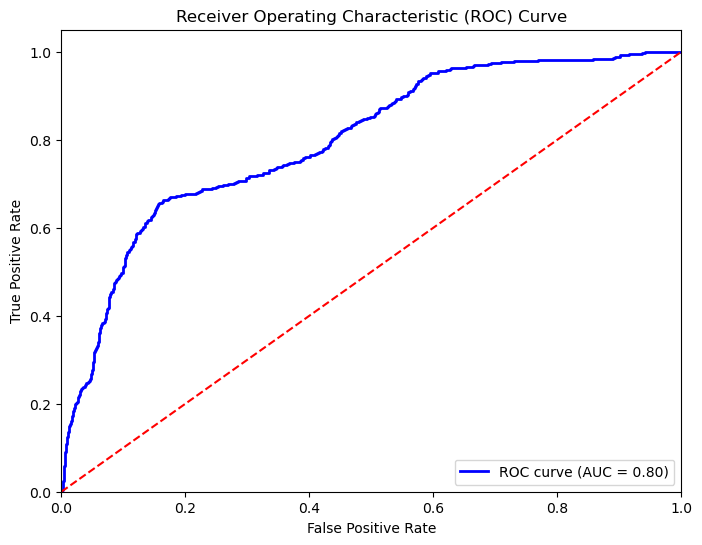

In [200]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The ROC plot above indicates that the logistic regression model performs well, with an area under the curve (AUC) of 0.80. A higher AUC score suggests better discrimination between positive and negative classes, implying that the model effectively distinguishes between employees who leave the company and those who stay.

## CONCLUSION:

The model demonstrates good performance overall in predicting employee churn, with an AUC of 0.80 indicating its effectiveness in distinguishing between employees who stay and those who leave. However, further analysis and model refinement may be necessary to improve the prediction accuracy further.